# Introduction

> This dataset was part of recruitment process of a perticular client of **ScaleneWorks**. **ScaleneWorks** supports several information technology (IT) companies in india with talent acquisition. One of the challange they face is about 30% of the candidate who accept the jobs offer, do not join th compnay, this leads to huge loss of revenue and time as the companies initiate the recrutiment process again to fill thw workforce demand. 

> **SceleneWorks** wants to find out if a model can be built to predict the likelihood of a candidates along with a column that indicates if the candidate finally joined the company or not.

> So let's build classification models to see what are chances of candidate's acceptance of an offer.

# Feature Description

1. **Candidate** - Unique reference number to identify candidate
2. **DOJ Extended** - Date of joining asked by candidate or not
3. **Duration to accept offer** - Number of days taken by th candidate to accept the offer
4. **Notice period** - Notice period served before candidate can join the company
5. **Offered band** - Band offered to candidate based on experience, performance
6. **Pecent hike expected in CTC** - Percentage hike expected by the candidate
7. **Percent hike offered in CTC** - Percentage hike offered by the company
8. **Percent difference CTC** - Difference between expected and offered hike
9. **Joining Bonus** - Joining bonus is given or not
10. **Candidate relocate actual** - Candidates have to relocate or not
11. **Gender** - Gender of the candidate
12. **Candidate Source** - Source from which resume of the candidate was obtained
13. **Rex in Yrs** - Relevant years of experience 
14. **LOB** - Line of business for which offere was rolled out
15. **Location** - Company location for which offer was rolled out
16. **Age** - Age of the candidate
17. **Status** - Target varible whether the candidate joined or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
# pre-processing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
# over-sampling
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
# classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
# shap importance
import shap
# progress bar
from tqdm import tqdm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# matplotlib defaults
plt.style.use("fivethirtyeight")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hrdatasetclassif/hr_data.csv


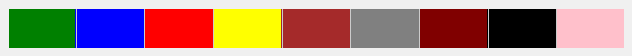

In [2]:
color = ["green", "Blue", "Red", "Yellow", "Brown", "Grey",'Maroon','black','Pink']
sns.set_palette(color)
sns.palplot(sns.color_palette())

# Descriptive data analysis

In [3]:
df = pd.read_csv("/kaggle/input/hrdatasetclassif/hr_data.csv",index_col='SLNO')
df.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
SLNO,,,,,,,,,,,,,,,,,
1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [4]:
df.shape

(8995, 17)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Candidate Ref,8995.0,2.843647e+06,486344.774552,2109586.00,2386476.00,2807482.0,3300059.50,3836076.00
Duration to accept offer,8995.0,2.143446e+01,25.811616,0.00,3.00,10.0,33.00,224.00
Notice period,8995.0,3.929183e+01,22.220239,0.00,30.00,30.0,60.00,120.00
Pecent hike expected in CTC,8995.0,4.386480e+01,29.788975,-68.83,27.27,40.0,53.85,359.77
Percent hike offered in CTC,8995.0,4.065736e+01,36.064060,-60.53,22.09,36.0,50.00,471.43
Percent difference CTC,8995.0,-1.573802e+00,19.610729,-67.27,-8.33,0.0,0.00,300.00
Rex in Yrs,8995.0,4.239022e+00,2.547571,0.00,3.00,4.0,6.00,24.00
Age,8995.0,2.991317e+01,4.097912,20.00,27.00,29.0,34.00,60.00


In [6]:
df.isnull().sum()

Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8995 entries, 1 to 12333
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate Ref                8995 non-null   int64  
 1   DOJ Extended                 8995 non-null   object 
 2   Duration to accept offer     8995 non-null   int64  
 3   Notice period                8995 non-null   int64  
 4   Offered band                 8995 non-null   object 
 5   Pecent hike expected in CTC  8995 non-null   float64
 6   Percent hike offered in CTC  8995 non-null   float64
 7   Percent difference CTC       8995 non-null   float64
 8   Joining Bonus                8995 non-null   object 
 9   Candidate relocate actual    8995 non-null   object 
 10  Gender                       8995 non-null   object 
 11  Candidate Source             8995 non-null   object 
 12  Rex in Yrs                   8995 non-null   int64  
 13  LOB              

In [8]:
# divide the num and cat columns

num_col = [col for col in df.columns if df[col].dtypes in ['int64','float64']]
cat_col = [col for col in df.columns if df[col].dtypes == 'object']

print("Numerical columns are: \n",num_col)
print("**********************************************************")
print('Categorical columns are: \n',cat_col)

Numerical columns are: 
 ['Candidate Ref', 'Duration to accept offer', 'Notice period', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Rex in Yrs', 'Age']
**********************************************************
Categorical columns are: 
 ['DOJ Extended', 'Offered band', 'Joining Bonus', 'Candidate relocate actual', 'Gender', 'Candidate Source', 'LOB', 'Location', 'Status']


#### Observations



# Exploratory data analysis

**Data set is cleaned with 8995 samples and 17 columns with mix of object, int64 and float64 data types**

**We have 8 numerical columns and 9 object columns**

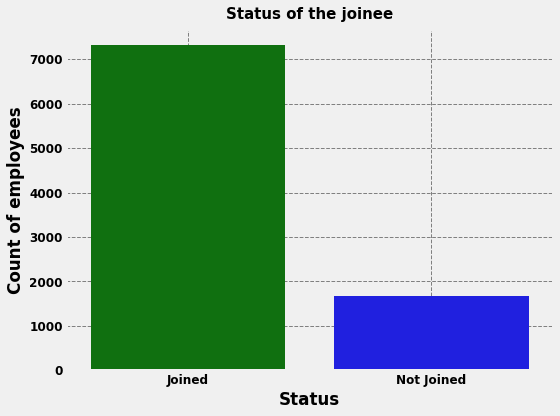

In [9]:
sts = df['Status'].value_counts().reset_index()

# plot the status of joinee
plt.figure(figsize=(8,6))
sns.barplot(x=sts['index'], y=sts.Status)
plt.grid(visible=True, linestyle='--', color=color[5])
plt.title('Status of the joinee', weight = 'bold', size = 15)
plt.xticks(size = 12, weight = 'bold')
plt.xlabel("Status")
plt.ylabel("Count of employees")
plt.yticks(size = 12, weight = 'bold')
plt.show()

#### Observations

**Classes are imbalanced as we can see in the plot**

**We will solve this problem using logistics regression as a base line and 7 other models using SMOTEENN resampler and gridserachCV.**

In [10]:
dis_col = []
cont_col = []

#keeping cardinality 10 seperate the discrete and continuos variables

for col in num_col:
    if col == 'Candidate Ref':
        pass
    elif df[col].nunique() < 10:
        dis_col.append(col)
    else:
        cont_col.append(col)  
    
print(dis_col)
print(cont_col)

['Notice period']
['Duration to accept offer', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Rex in Yrs', 'Age']


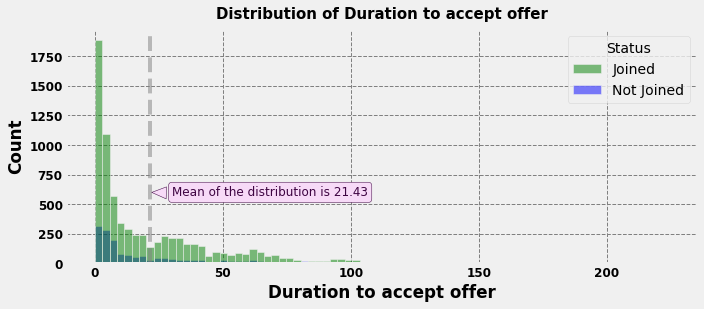

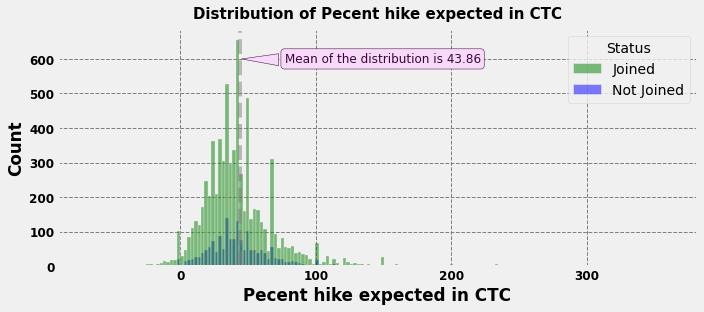

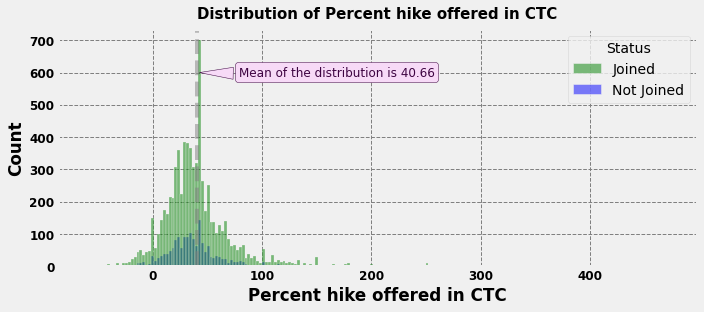

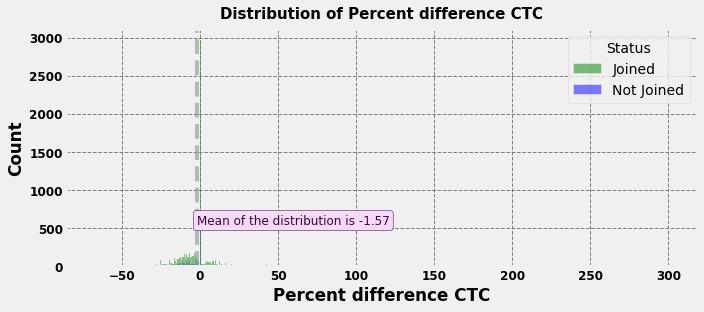

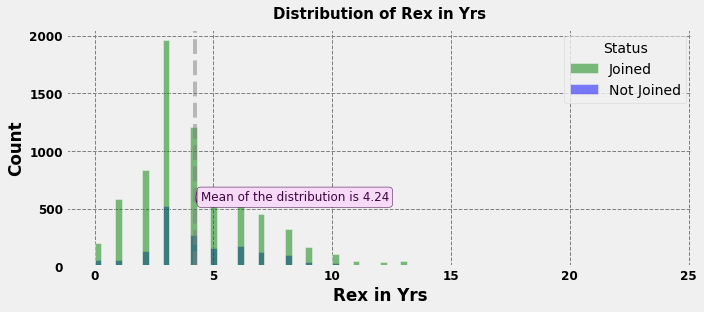

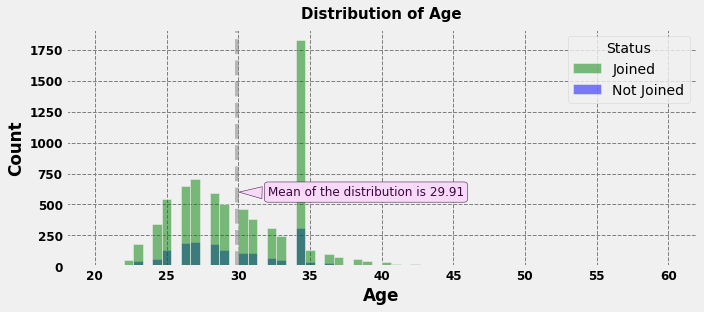

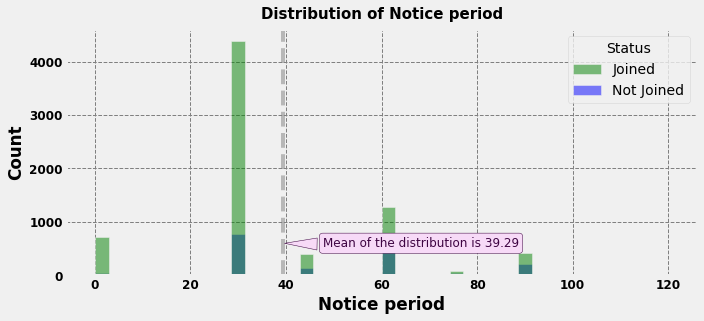

In [11]:
# find out the distribution of continous columns
cont_col.append('Notice period')
for i,col in enumerate(cont_col):
    plt.figure(figsize=(10,28))
    plt.subplot(7,1,i+1)
    sns.histplot(x=df[col], 
                 hue=df['Status'], 
                 color=color[2])
    plt.axvline(x=df[col].mean(), 
                linestyle='--', 
                alpha= 0.5, 
                color=color[5])
    plt.title(f'Distribution of {col}', 
              weight = 'bold', 
              size = 15)
    plt.xticks(size = 12, 
               weight = 'bold')
    plt.yticks(size = 12,
               weight = 'bold')
    plt.grid(visible=True, 
             linestyle='--', 
             color=color[5])
    plt.annotate(f'Mean of the distribution is {round(df[col].mean(),2)}',
            xy=(df[col].mean(),600),
            xycoords='data',
            xytext=(df[col].mean()+1, 0), textcoords='offset points',
            size=12, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))
    
plt.show() 

#### Observations

**There is no significant features are seen from above plots. none of the features explicitly explaines target variable.**

**Average percent hike offered is lower than the expected by the candidate.**

**Average age is about 29.9 years with majority numbers of candidates from 30+ years age group.**

**On An avearge candidates take 21 days to accept the offer by the company.**

**Majority of the candidates are having low relevant years of experience in their respective line of business with average of 4.24 years.**

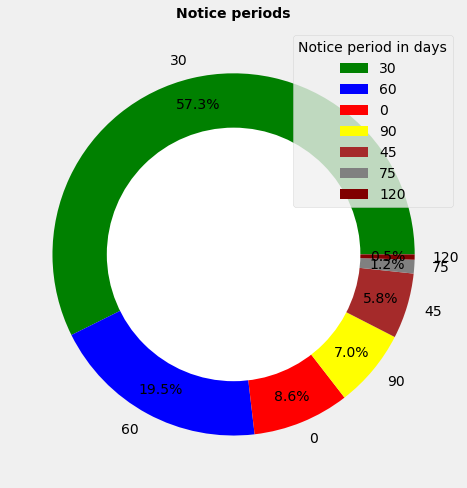

In [12]:
donutdf = pd.DataFrame(df['Notice period'].value_counts())

# plot donut chart of Notice period
notice = donutdf.index
numbers = donutdf.values.ravel()
colors = color
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
#plot the pie
fig=plt.figure(figsize=(7,7))
fig=plt.pie(numbers, 
        colors=colors, 
        labels=notice, 
        autopct='%1.1f%%', 
        pctdistance=0.85, 
        )
centre_circle = plt.Circle((0,0), 0.7, fc='White')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Notice periods")
plt.legend(title="Notice period in days")
plt.show()

In [13]:
nt_df= df.pivot_table(index='Notice period',
              columns='Status',
              values='Candidate Ref',
              aggfunc="count")
nt_df['ratio_by_joining'] = nt_df['Joined']/nt_df['Not Joined']
nt_df['Joining percent'] = nt_df['Joined']/(nt_df['Joined']+nt_df['Not Joined'])*100
nt_df

Status,Joined,Not Joined,ratio_by_joining,Joining percent
Notice period,,,,
0,726,51,14.235294,93.436293
30,4393,765,5.742484,85.168670
45,397,129,3.077519,75.475285
60,1285,470,2.734043,73.219373
75,75,35,2.142857,68.181818
90,415,212,1.957547,66.188198
120,22,20,1.100000,52.380952


#### Observations

**We can learn that 30 days notice period is the most common among employers**

**As we can learn from above table as notice period increasing percent of people joining to comapny is decreasing which is significant trend to notice.**

**We learned this from feature importance of tree based model RANDOM FOREST, so here we are able to answer to out HR that Notice period is factor that likely affacts the candidiates joining status.**

**More the time for notice period, lesser the likelihood of candidate to join the company.**

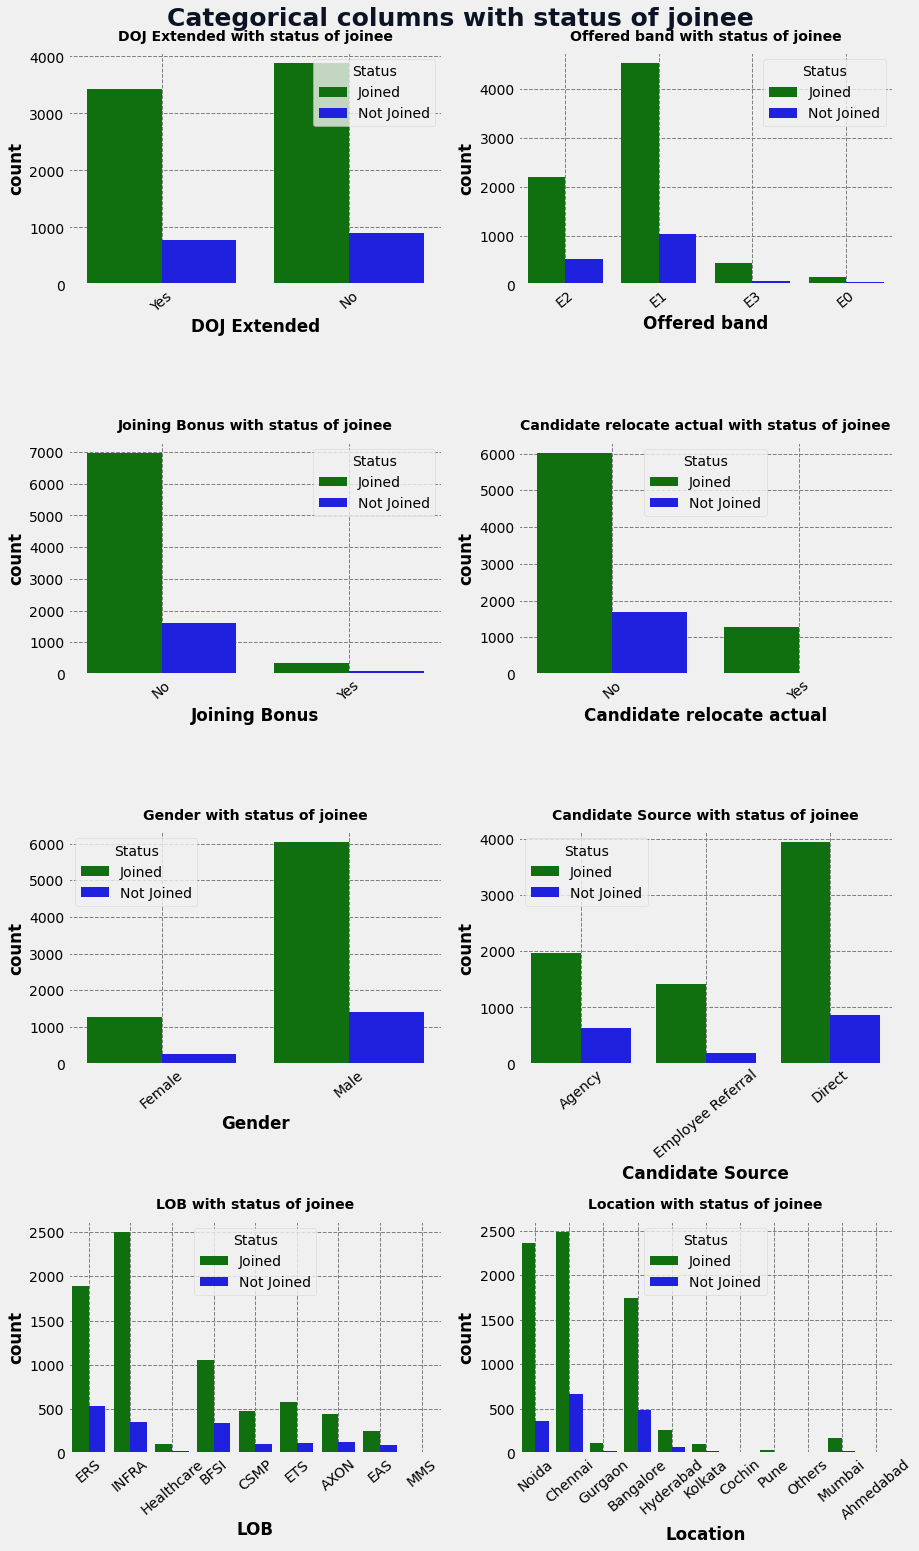

In [14]:
col_list = [col for col in cat_col if col != 'Status']

fig, ax = plt.subplots(4,2, figsize=(13,22))
for idx, col in enumerate(col_list):
    sns.countplot(x=col, hue='Status', data=df, ax=ax[idx//2, idx%2])
    ax[idx//2, idx%2].grid(visible=True, linestyle='--', color=color[5])
    ax[idx//2, idx%2].set_xticklabels(list(df[col].unique()), rotation=40)
    ax[idx//2, idx%2].set_title(f'{col} with status of joinee', pad=12)
    
plt.suptitle(f'Categorical columns with status of joinee', fontsize=25, fontweight='bold',
            color='#0b1324')
plt.show()

#### Observations

**We have most numbers of candidates from chennai city of india and also more joinees are from chennai, vice versa.**

**Majority of cadidates are sourced directly by the company.**

**Majority of the candidates are Male.**

**E1 offer band is the most common among the employers.**

In [15]:
nlobdf= pd.DataFrame(df.groupby(['Notice period','LOB'])['Candidate Ref'].count())
nlobdf

Candidate Ref
Notice period LOB                      
0             AXON                   53
              BFSI                   39
              CSMP                   26
              EAS                    28
              ERS                   173
              ETS                    63
              Healthcare              8
              INFRA                 387
30            AXON                  291
              BFSI                  814
              CSMP                  357
              EAS                   172
              ERS                  1374
              ETS                   343
              Healthcare             69
              INFRA                1731
              MMS                     7
45            AXON                   34
              BFSI                   61
              CSMP                   43
              EAS                    19
              ERS                   202
              ETS                    46
              Healthcare              5
              INFRA                 115
              MMS                     1
60            AXON                  101
              BFSI                  327
              CSMP                  118
              EAS                    83
              ERS                   482
              ETS                   167
              Healthcare             31
              INFRA                 441
              MMS                     5
75            AXON                    6
              BFSI                    6
              CSMP                    5
              EAS                     7
              ERS                    37
              ETS                    11
              Healthcare              1
              INFRA                  37
90            AXON                   75
              BFSI                  147
              CSMP                   29
              EAS                    37
              ERS                   141
              ETS                    59
              Healthcare             10
              INFRA                 127
              MMS                     2
120           AXON                    8
              BFSI                    2
              CSMP                    1
              ERS                    17
              ETS                     2
              INFRA                  12

#### Observations

**Numner of candidates by line of business and notice period**

In [16]:
df.pivot_table(values='Percent difference CTC',
              index='Location',
              columns='Status',
              aggfunc=[np.mean, np.median, np.max, np.min])

mean             median               amax              amin  \
Status        Joined Not Joined  Joined Not Joined  Joined Not Joined Joined   
Location                                                                       
Ahmedabad -11.430000 -28.000000   0.000    -28.000   16.67     -28.00 -48.82   
Bangalore  -1.642899  -3.142889   0.000     -3.280  300.00     144.95 -66.67   
Chennai    -0.868998  -3.825858   0.000     -4.170  272.34     300.00 -60.00   
Cochin    -19.285714   0.000000 -20.000      0.000    0.00       0.00 -40.00   
Gurgaon    -2.627458  -1.876071  -3.665      0.000   68.00      20.29 -41.67   
Hyderabad   0.213083  -1.133200   0.000     -5.000  129.17     152.50 -39.29   
Kolkata    -5.930300  -6.189310  -3.355     -5.000   19.51      10.00 -46.00   
Mumbai     -2.301250  -5.903333   0.000      0.000   46.43       6.14 -61.54   
Noida      -1.101859  -0.884767   0.000      0.000  233.33     175.00 -67.27   
Others     -1.286154        NaN   0.000        NaN   11.11        NaN -14.50   
Pune       -3.793158  -6.106000  -1.090     -3.845   20.00       7.41 -45.00   

                      
Status    Not Joined  
Location              
Ahmedabad     -28.00  
Bangalore     -43.75  
Chennai       -48.57  
Cochin          0.00  
Gurgaon       -12.50  
Hyderabad     -43.75  
Kolkata       -56.36  
Mumbai        -24.62  
Noida         -62.50  
Others           NaN  
Pune          -23.08

#### Observations

**Above table shows citywise CTC percent diffrence and candidates joined or not joined status with statistics**

**On an average, candidates are less likely to join the company if offered Hike is lower than the expected.**

In [17]:
df.pivot(index='Candidate Ref',
        columns='Status',
        values='Candidate Source')

Status,Joined,Not Joined
Candidate Ref,,
2109586,Direct,NaN
2109941,Agency,NaN
2110407,Agency,NaN
2110719,NaN,Direct
2111873,Agency,NaN
...,...,...
3828206,Direct,NaN
3828911,Direct,NaN
3834159,Direct,NaN


#### Observations

**From where candidates joinee the firms**

In [18]:
rex_offerdf = df.groupby(['Offered band','Rex in Yrs']).Age.mean().reset_index()
rex_offerdf

,Offered band,Rex in Yrs,Age
0,E0,0,23.118812
1,E0,1,30.000000
2,E0,2,30.500000
3,E1,0,27.434783
4,E1,1,27.148936
5,E1,2,28.032941
6,E1,3,28.769092
7,E1,4,29.687554
8,E1,5,30.669136
9,E1,6,31.511111


#### Observations

**We can learn that years of experience, Age directly proportaional to offerband**

In [19]:
#notice period and offer band

df.pivot_table(values='Percent hike offered in CTC',
              index=['Notice period'],
              columns=['Offered band'],
              aggfunc=[np.mean,np.min,np.max])

mean                                    amin         \
Offered band          E0         E1         E2         E3     E0     E1   
Notice period                                                             
0              40.948085  39.378929  38.437539  30.852778  11.11 -40.00   
30             42.279573  41.825814  39.957146  37.395843 -60.00 -54.55   
45                   NaN  41.865846  46.189012  31.996552    NaN -43.75   
60                   NaN  43.486045  39.227492  34.309883    NaN -33.33   
75                   NaN  37.226444  37.244898  42.367500    NaN -28.00   
90                   NaN  36.676554  32.237941  52.875469    NaN -40.00   
120                  NaN  34.538667  36.556364  38.910000    NaN -16.67   

                               amax                          
Offered band      E2     E3      E0      E1      E2      E3  
Notice period                                                
0             -28.13 -31.14   80.00  233.33  266.67  300.00  
30            -60.53 -48.25  128.57  471.43  320.00  333.33  
45            -10.53  -6.45     NaN  177.78  266.67  236.67  
60            -30.77 -48.57     NaN  225.00  393.33  266.67  
75             -2.54  -9.17     NaN   75.00  150.00  137.50  
90            -55.75 -21.54     NaN  140.00  211.11  414.29  
120             6.38  22.97     NaN  107.14   76.00   57.00

#### Observations

**Above table shows mean, max, and min percent hike offered for each notice period and offered band**

**It also shows for E3 offer band mean hike lesser than E0. except for 75 and 90 notice period rows**

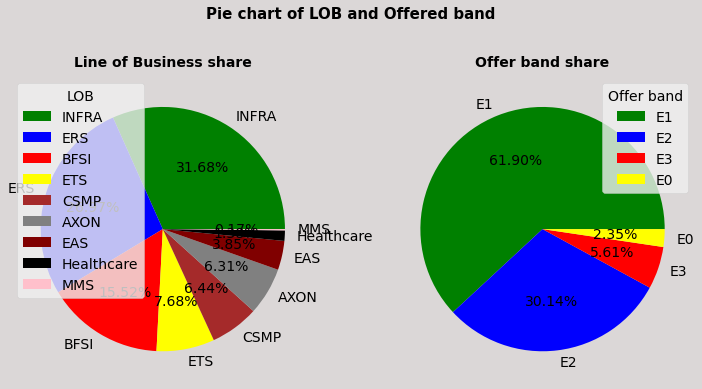

In [20]:
lobdf = df['LOB'].value_counts()
offerdf = df['Offered band'].value_counts()

# plot the pie charts
plt.figure(figsize=(10,6), facecolor='#dbd7d7')

plt.subplot(1,2,1)
plt.pie(lobdf.values, 
        colors=color, 
        labels=lobdf.index,
       autopct='%1.2f%%')
plt.legend(title='LOB')
plt.title("Line of Business share")

plt.subplot(1,2,2)
plt.pie(offerdf.values,
       colors=color,
       labels=offerdf.index,
       autopct='%1.2f%%')
plt.legend(title='Offer band')
plt.title("Offer band share")

plt.suptitle("Pie chart of LOB and Offered band", weight='bold', size=15)
plt.show()

#### Observations

**From this charts we can learn that 31.68% candidates are from Infra LOB and 61.9% of candidates were offered E1 offer band**

# Pre-processing and baseline

> pre-process and logistics regression as baseline with cross validation

> pipeline for all the models with gridsearchCV and RandomizedsearchCV 

In [21]:
# pre-processing the dataframe to build logistic regression model

n_df = df.drop('Candidate Ref', axis=1)

# divide X and y(target)
X = n_df.drop('Status', axis=1)
y = n_df.Status.map({'Joined':1,
                   'Not Joined':0})

# divide the data and Over-Sample, One hot encoder and scale the data

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding the categorical data
cat_features = [col for col in X_trn.columns if X_trn[col].dtypes == 'object']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
OH_train = pd.DataFrame(OH_encoder.fit_transform(X_trn[cat_features]))
OH_test = pd.DataFrame(OH_encoder.fit_transform(X_tst[cat_features]))

# put the index back
OH_train.index = X_trn.index
OH_test.index = X_tst.index

# drop object cols from X_trn and X_tst
num_trn = X_trn.drop(cat_features, axis=1)
num_tst = X_tst.drop(cat_features, axis=1)

# concat onhot and num data frame
OH_X_trn = pd.concat([num_trn, OH_train], axis=1)
OH_X_tst = pd.concat([num_tst, OH_test], axis=1)

In [22]:
print("before resampling")
y_trn.value_counts()

before resampling


1    5854
0    1342
Name: Status, dtype: int64

In [23]:
# resample the datasets with over and under sampling
sm = SMOTEENN(enn = EditedNearestNeighbours(sampling_strategy='all', kind_sel="mode"),
             random_state=42)
X_retrn, y_retrn = sm.fit_resample(X = OH_X_trn, y= y_trn)

print("After resampling")
y_retrn.value_counts()

After resampling


0    5573
1    4047
Name: Status, dtype: int64

In [24]:
X_retst, y_retst = sm.fit_resample(X = OH_X_tst, y= y_tst)
y_retst.value_counts()

0    1366
1    1004
Name: Status, dtype: int64

**A much balanced dataset as we can see**

In [25]:
# scale the dataset with minmax scaler
scaler = MinMaxScaler()
scaler.fit(X_retrn)
X_retrn = pd.DataFrame(scaler.fit_transform(X_retrn))
X_retst = pd.DataFrame(scaler.transform(X_retst))

# Logistics regression model (BaseLine)

In [26]:
# logistics regression model
LR = LogisticRegression(random_state = 42, solver='liblinear', max_iter = 1500)

# cross validation scoring
cv_score = cross_val_score(estimator=LR, X = X_retrn ,y= y_retrn, scoring='roc_auc',
                          cv=5, n_jobs=-1)

# print the mean CV score and std dev
print(np.mean(cv_score), np.std(cv_score))

0.791335065331862 0.01499836914718174


In [27]:
# fittting the model
LR.fit(X= X_retrn, y = y_retrn) 

prediction = LR.predict(X = X_retst) # predictions on test data

print("Classification report of the logistics regression model: \n",
      classification_report(y_retst, prediction)) # print the classification report
print("======================================================")
print("Roc Auc score of the LR model: \n", roc_auc_score(y_retst, prediction)) # roc_auc
print("======================================================")
print("Accuracy score of the LR model: \n", accuracy_score(y_retst, prediction)) #accuracy

Classification report of the logistics regression model: 
               precision    recall  f1-score   support

           0       0.72      0.84      0.78      1366
           1       0.72      0.56      0.63      1004

    accuracy                           0.72      2370
   macro avg       0.72      0.70      0.70      2370
weighted avg       0.72      0.72      0.71      2370

Roc Auc score of the LR model: 
 0.6984594564640414
Accuracy score of the LR model: 
 0.720253164556962


#### Observations:

**With cross-validation we found our score was much better compared to regular fitted method**

**We got almost 70% ROC-AUC with 72% of accuracy score with our baseline logistic regression model**

In [28]:
# confusion metrics and ROC CURVE plots
def plot_metrics(model, X:np.array, y_target:np.array) -> plt.figure:
    """
    Plot the confusion metrics and ROC-AUC curve for test dataset
    
    Arguments:
    predicted(model)
    X(array) : input test data
    y_target(array) : target_vector
    """
    prediction = model.predict(X)
    
    # compute the confusion matrix
    cm = confusion_matrix(y_target, prediction, labels=model.classes_)
    display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels = model.classes_)
    
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    fig.tight_layout(pad=3, h_pad=2, w_pad=4)
    fig.suptitle(type(model).__name__, weight=12)
    ax[0] = display.plot(ax= ax[0])
    
    # ROC CURVE
    y_pred_prob = model.predict_proba(X)[::,1]
    fpr, tpr, thresholds = roc_curve(y_target, y_pred_prob,
                                    drop_intermediate=False)
    auc = roc_auc_score(y_target, y_pred_prob)
    
    ax[1].plot(fpr, tpr, color=color[6],
              label= f'AUC = {auc:2.2f}')
    ax[1].plot([0,1], [0,1.01], 'r--', lw=1)
    ax[1].legend(loc='lower right', fontsize=10)
    ax[1].set_ylabel('True Positive Rate', fontsize=10)
    ax[1].set_xlabel('Flase Positve Rate', fontsize=10)
    ax[1].set_title("Receiver Operating Characteristic (ROC) curve", fontsize=10)

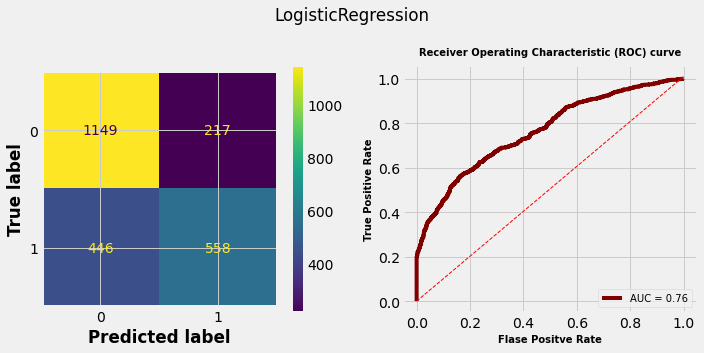

In [29]:
plot_metrics(model=LR, X=X_retst, y_target=y_retst)

# RandomForestClassifier with feature importancce

In [30]:
RF = RandomForestClassifier(max_depth=10,
                           n_estimators=150,
                           max_features= 'auto') # random forest object

RF.fit(X_retrn, y_retrn) # fit the model to data


prediction1 = RF.predict(X_retst) # predict on test data

print("Classification report of the Random forest model: \n",
      classification_report(y_retst, prediction1)) # print the classification report
print("======================================================")
print("Roc Auc score of the RF model: \n", roc_auc_score(y_retst, prediction1)) # roc_auc
print("======================================================")
print("Accuracy score of the RF model: \n", accuracy_score(y_retst, prediction1)) #accuracy

Classification report of the Random forest model: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1366
           1       0.82      0.87      0.84      1004

    accuracy                           0.86      2370
   macro avg       0.86      0.86      0.86      2370
weighted avg       0.86      0.86      0.86      2370

Roc Auc score of the RF model: 
 0.8630186428517262
Accuracy score of the RF model: 
 0.8620253164556962


In [31]:
# Now let's do cross validation
# cross validation scoring
cv_score1 = cross_val_score(estimator=RF, X = X_retrn ,y= y_retrn, scoring='roc_auc',
                          cv=5, n_jobs=-1)

# print the mean CV score and std dev
print(np.mean(cv_score1), np.std(cv_score1))

0.954692748770759 0.07175954899995202


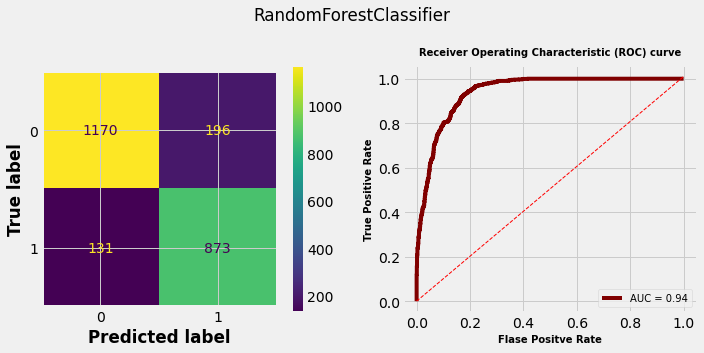

In [32]:
plot_metrics(model=RF, X=X_retst, y_target=y_retst)

#### Observations:

**As we can learn that random forest are having accuracy of 86% and AUC upto 95% with cross validation**

In [33]:
# SHAP importance and sklearn feature importance
shap.__version__

'0.40.0'

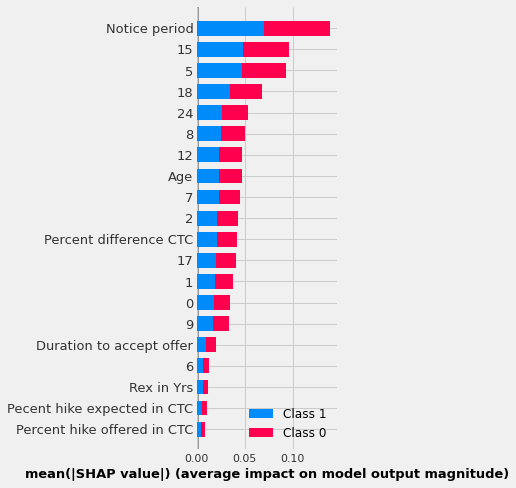

In [34]:
# shap explaier of random forest model
explain = shap.TreeExplainer(RF)

shap_values = explain.shap_values(X_retst)
shap.summary_plot(shap_values, features = OH_X_trn,
                 plot_type='bar',
                 plot_size=(5,7))

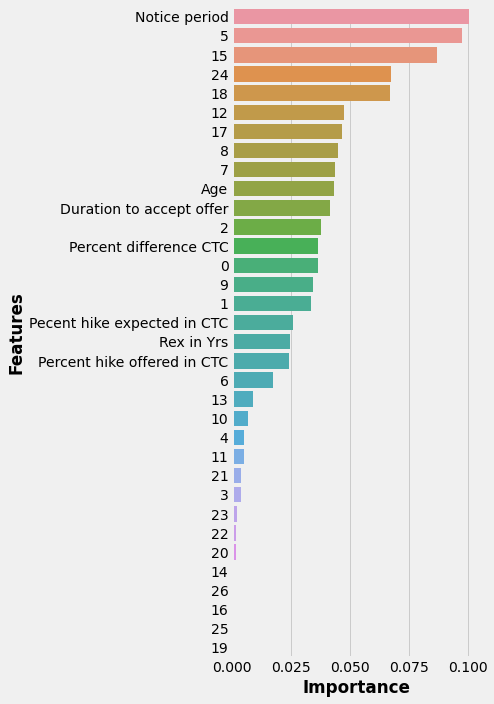

In [35]:
# using feature imporatance methods
featre_rank = pd.DataFrame({"Features": OH_X_trn.columns,
                           "Importance": RF.feature_importances_}
                          )
featre_rank2 = featre_rank.sort_values('Importance', ascending=False)

# plot the feature imp by sklearn 
plt.figure(figsize=(7,10))
sns.barplot(x='Importance',y='Features', orient='h', data=featre_rank2)
plt.show()

#### Observations

**We can learn that 'Notice period' and categorical feature of 5 and 15 are most important with both methods but their order is not the same.**

**Here, we can learn that these features are most predictor of whether or not candidate with join the company**

**Features of categories 5 and 15 are 'Joining bonus' and and 'LOB' respectivaly. so we can estimate that, both features contribute to the prediction of target variable.**

# Pipeline of 8 models to find optimal classification accuracy

### RandomizedSearchCV

In [36]:
# instances of each model
RF_clf = RandomForestClassifier(random_state=42)
AD_clf = AdaBoostClassifier(random_state=42)
LR_clf = LogisticRegression(random_state = 42, solver='liblinear', max_iter = 1500)
GB_clf = GradientBoostingClassifier(random_state=42)
ET_clf = ExtraTreesClassifier(random_state = 42)
DT_clf = DecisionTreeClassifier(random_state=42)
KN_clf = KNeighborsClassifier( )
SVC_clf = SVC(degree=10, probability = True, random_state = 42)
NB_clf = BernoulliNB()

In [37]:
# pipeline of all the models with gridsearchCV & RandomSearchCV

#Random Forest 1
param_RF = {}
param_RF['classifier__n_estimators'] = [50,100,150,200,250]
param_RF['classifier__max_features'] = ['auto', 'sqrt', 'log2']
param_RF['classifier__max_depth'] = [5,8,10,14,20]
param_RF['classifier__class_weight'] = [None,{0:1,1:5},
                                       {0:1,1:10},{0:1,1:15}]
param_RF['classifier'] = [RF_clf]


# Adaboost 2
param_AD = {}
param_AD['classifier__n_estimators'] = [3,4,6,8,10,15,25,40]
param_AD['classfier__learning_rate'] = [(0.96 + x/100) for x in range(0,8)]
param_AD['classifier_algorithm'] = ['SAMME','SAMME.R']
param_AD['classifier'] = [AD_clf]

# Logistic regression 3
param_LR = {}
param_LR['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param_LR['classifier__penalty'] = ['l1', 'l2']
param_LR['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_LR['classifier'] = [LR_clf]

# Decision Tree 4
param_DT = {}
param_DT['classifier__max_depth'] = [5,10,25,None]
param_DT['classifier__min_samples_leaf'] = [2,5,10]
param_DT['classifier__criterion'] = ["gini", "entropy"]
param_DT['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_DT['classifier'] = [DT_clf]

# Extra trees 5
param_ET = {}
param_ET['classifier__max_depth'] = [5,10,25,None]
param_ET['classifier__max_features'] = [2,5,10]
param_ET['classifier__min_samples_split'] = [2,3,10]
param_ET['classifier__min_samples_leaf'] = [1,3,10]
param_ET['classifier__bootstrap'] = [False]
param_ET['classifier__n_estimators'] = [100,300]
param_ET['classifier__criterion'] = ['gini']
param_ET['classifier'] = [ET_clf]

# K-nearest neighbors 6
param_KN = {}
param_KN['classifier__n_neighbors'] = [5,7,9,11,13,15]
param_KN['classifier'] = [KN_clf]

# Support vector classifier 7
#param_SVC = {}
#param_SVC['classifier__C'] =  [0.1, 1, 10, 100] 
#param_SVC['classifier__gamma'] = [1.0, 0.1, 0.01, 0.001]
#param_SVC['classifier__kernel'] = ['rbf', 'poly', 'sigmoid']
#param_SVC['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
#param_SVC['classifier'] = [SVC_clf]

#Naive Bayes 8 
param_NB = {}
param_NB['classifier__alpha'] = np.logspace(0,-9, num=100)
param_NB['classifier'] = [NB_clf]

# Gradient Boosting 9
param_GB = {}
param_GB['classifier__n_estimators'] = [10, 50, 100, 250]
param_GB['classifier__max_depth'] = [5, 10, 20]
param_GB['classifier'] = [GB_clf]

In [38]:
#pipeline instance
pipeline = Pipeline([('classifier', RF_clf)])

# hyperparamets list
myparams = [param_RF, param_AD, param_LR, param_DT, param_KN, param_ET, param_NB, param_GB]

In [39]:
%%time
# modelling using randomized search CV
mymodel = RandomizedSearchCV(pipeline, myparams, cv=5, n_jobs=2,
                            scoring='roc_auc').fit(X_retrn, y_retrn)

CPU times: user 1.45 s, sys: 51.8 ms, total: 1.5 s
Wall time: 24.1 s


In [40]:
# best estimator
mymodel.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=20, random_state=42))])

In [41]:
mymodel.best_params_

{'classifier__n_estimators': 100,
 'classifier__max_features': 'auto',
 'classifier__max_depth': 20,
 'classifier__class_weight': None,
 'classifier': RandomForestClassifier(max_depth=20, random_state=42)}

In [42]:
mymodel.best_score_

0.9671166323695719

In [43]:
pred = mymodel.best_estimator_.predict(X_retst)
pred_proba = mymodel.best_estimator_.predict_proba(X_retst)
scoring = mymodel.score(X_retst, y_retst)
classif_report = classification_report(y_retst, pred)
accuracy_final = accuracy_score(y_retst, pred)
auc_score = roc_auc_score(y_retst, pred)
print("Classification report of best RF model is: \n", classif_report)
print("******************************************************")
print("Accuracy of the best RF model is: \n", round(accuracy_final,3)*100)
print("******************************************************")
print("Auc score of the best RF model is: \n", round(auc_score, 3)*100)
print("******************************************************")
print("Scoring of test data on the best estimator: \n",scoring)

Classification report of best RF model is: 
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      1366
           1       0.79      0.92      0.85      1004

    accuracy                           0.87      2370
   macro avg       0.86      0.87      0.86      2370
weighted avg       0.88      0.87      0.87      2370

******************************************************
Accuracy of the best RF model is: 
 86.5
******************************************************
Auc score of the best RF model is: 
 87.3
******************************************************
Scoring of test data on the best estimator: 
 0.9285981987131999


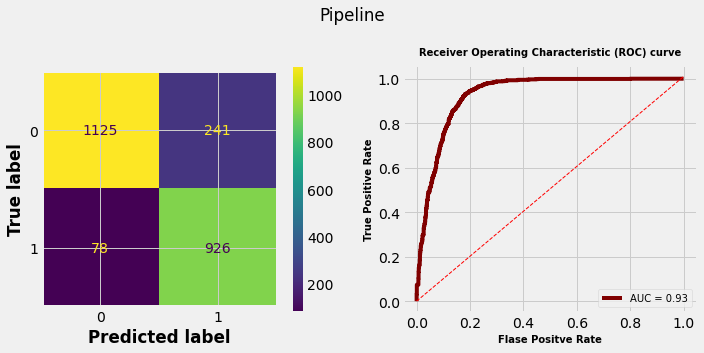

In [44]:
plot_metrics(model= mymodel.best_estimator_ , X = X_retst, y_target=y_retst)

#### Observations

**For Randomaized search CV model we found best estimator of random forest with upto accuracy of 86.6% with ROC_AUC score of 94% on test data**

**As it is randomized search of parameters with best settings accuracy and auc score vary at each notebook run**

### GridSearchCV

In [45]:
# Define hyperparameters for all models

# Random Forest 
RF_params = {}
RF_params['n_estimators'] = [5,10,50,100]
RF_params['max_features'] = ['sqrt', 'log2']
RF_params['max_depth'] =  [4,5,6]
RF_params['criterion'] = ['gini', 'entropy']

# Adaboost 
AD_params = {}
AD_params['n_estimators'] =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20]
AD_params['learning_rate'] =  [(0.97 + x / 100) for x in range(0, 8)]
AD_params['algorithm'] =  ['SAMME', 'SAMME.R']

# Logistic Regression
LR_params = {}
LR_params['C'] = np.logspace(-4,4,20) 
LR_params['penalty'] = ['l1', 'l2']

# Decission Tree
DT_params = {}
DT_params['max_depth'] =  [1, 2, 3, 10, 20]
DT_params['min_samples_leaf'] = [2, 5, 10, 50, 100]
DT_params['criterion'] = ["gini", "entropy"]
# 50 combinations

# Extra Trees
ET_params = {}
ET_params['max_depth'] = [5,10,25,None]
ET_params['max_features'] = [2,5,10]
ET_params['min_samples_split'] = [2,3,10]
ET_params['min_samples_leaf'] = [1,3,10]
ET_params['bootstrap'] = [False]
ET_params['n_estimators'] = [100,300]
ET_params['criterion'] = ['gini']

# KNeighbors 
KN_params = {}
KN_params['n_neighbors'] = [5,7,9,11,13,15]
KN_params['weights'] = ['uniform','distance']
KN_params['metric' ] = ['minkowski','euclidean','manhattan']

# Support Vector Classifier
#SVC_params = {}
#SVC_params['C'] = [0.1,1, 10, 100]
#SVC_params['gamma'] = [1,0.1,0.01,0.001]
#SVC_params['kernel'] = ['rbf', 'poly', 'sigmoid']

# Naive Bayes
NB_params = {}
NB_params['alpha'] = [0.01, 0.1, 0.5, 1.0, 10.0]

# Gradient Boosting
GB_params = {}
GB_params['n_estimators'] = [10, 50, 100, 250]
GB_params['max_depth'] = [5, 10, 20]

In [46]:
# model list and parameters list
model_list = [RF_clf, AD_clf, ET_clf, LR_clf, DT_clf, KN_clf, NB_clf, GB_clf]
param_list = [RF_params, AD_params, ET_params, LR_params, DT_params, KN_params, NB_params, GB_params]

# zip the model and param list dict of dicts 
init_models = dict(zip(model_list,param_list))

In [47]:
%%time
# Grid search CV models

for model, params in tqdm(init_models.items()):
    
    mymodel = GridSearchCV(estimator=model,
                          param_grid=params,
                          scoring='roc_auc',
                          cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                          n_jobs=-1)
    mymodel.fit(X_retrn, y_retrn)
    best_model = mymodel.best_estimator_
    best_params = mymodel.best_params_
    best_score = mymodel.best_score_
    preds = mymodel.predict(X_retst)
    accuracyGSCV = accuracy_score(y_retst, preds)
    roc_auc = roc_auc_score(y_retst, preds)
    classif_report = classification_report(y_retst, preds)
    
print(f"Classification report of best {best_model} is: \n", classif_report)
print("******************************************************")
print(f"Accuracy of the best {best_model} is: \n", round(accuracyGSCV,3)*100)
print("******************************************************")
print(f"Auc score of the best {best_model} is: \n", round(roc_auc, 3)*100)
print("******************************************************")
print("Scoring of the best estimator: \n", best_score)
print("******************************************************")
print(f"Best model is {best_model} and best parameters are \n{best_params}")

100%|██████████| 8/8 [12:27<00:00, 93.46s/it]

Classification report of best GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42) is: 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      1366
           1       0.80      0.89      0.84      1004

    accuracy                           0.86      2370
   macro avg       0.85      0.86      0.85      2370
weighted avg       0.86      0.86      0.86      2370

******************************************************
Accuracy of the best GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42) is: 
 85.7
******************************************************
Auc score of the best GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42) is: 
 86.1
******************************************************
Scoring of the best estimator: 
 0.9702575450929537
******************************************************
Best model is GradientBoostingClassifier(max_depth=10, n_estimators=250,

#### Observations

**We recieved best scoring on training dataset as it overfits the data but our testing accuracy is low with gradient boosting classifer.**

**With Gradient boosting being the best model, model accuracy on testing data is about 85.7% and ROC-AUC score is about 86.1%**


# Conclusions

**In the end, as per the project objective, we needed to answer HR that what affects candidates joining in the company?, here are our answers🔽**

1. Notice period affects the most whether or not candidate will join the company.
2. If offered hike is lower than expected than candidate is more likely to withdraw from the application
3. LOB and joning bonus affect the likelihoog of the candidates. so keep this in mind.

                                                
                                                
                                              Summary of model performances:

|       Model name    | ROC-AUC | Accuracy |
|---------------------|---------|----------|
|Logistics            |   70%   |   72%    |
|RFC                  |   86%   |   86%    |
|RFC(RandomizedSearch)|upto94%  |   86.7%  |
|GBT(Gridsearch)      |   86.1% |   85.7%  |